EMAIL SPAM DETECTION USING MACHINE LEARNING TECHNIQUES



THIS PROJECT IS DONE BY SAKSHI K MORE

loading all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import datetime as dt
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter

In [2]:
email_data=pd.read_csv('spam.csv',encoding='latin-1')
email_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
email_data.shape

(5572, 5)

In [4]:
email_data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
email_data=email_data.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],axis=1)

In [6]:
email_data.columns

Index(['v1', 'v2'], dtype='object')

In [7]:
email_data.rename(columns={'v1':'Category','v2':'Text'},inplace=True)

In [8]:
email_data.describe()

,Category,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
email_data.isnull().sum()

Category    0
Text        0
dtype: int64

In [10]:
email_data.duplicated().sum()

403

In [11]:
email_data=email_data.drop_duplicates(keep='first')

In [12]:
email_data.isna().sum()

Category    0
Text        0
dtype: int64

In [13]:
email_data['Category'].value_counts()

ham     4516
spam     653
Name: Category, dtype: int64

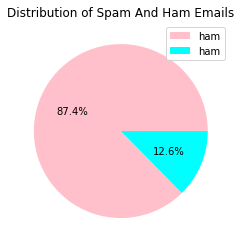

In [14]:
plt.pie(email_data['Category'].value_counts(),colors=['pink','cyan'],autopct='%1.1f%%')
plt.title('Distribution of Spam And Ham Emails')
plt.legend(email_data['Category'],loc='upper right')

In [15]:
email_data['Len_text']=email_data['Text'].apply(len)

In [16]:
email_data.head()

,Category,Text,Len_text
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
spam_data=email_data[email_data['Category']=='spam']

In [18]:
ham_data=email_data[email_data['Category']=='ham']

In [19]:
ham_sample=ham_data.sample(653)

<AxesSubplot:ylabel='Frequency'>

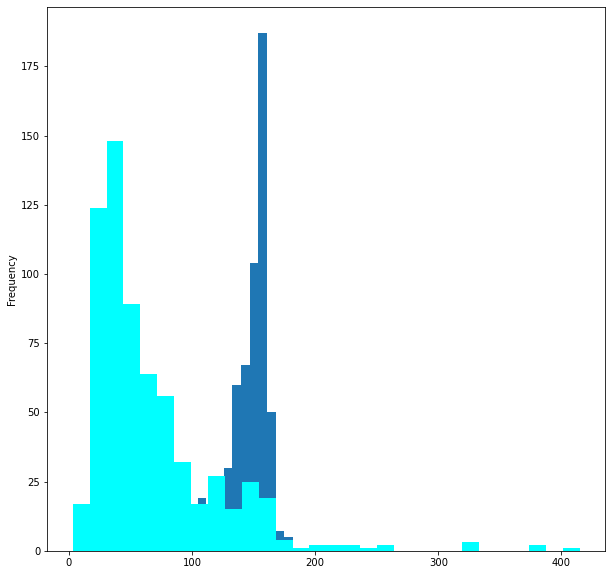

In [20]:
plt.figure(figsize=(10,10))
spam_data['Len_text'].plot(bins=30,kind='hist')
ham_sample['Len_text'].plot(bins=30,kind='hist',color='cyan')

In [21]:
email_data['Category_label']=email_data['Category'].map({'spam':1,'ham':2})

In [22]:
email_data.head()

,Category,Text,Len_text,Category_label
0,ham,"Go until jurong point, crazy.. Available only ...",111,2
1,ham,Ok lar... Joking wif u oni...,29,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Sakshi
[nltk_data]     more\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Sakshi
[nltk_data]     more\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
def transform(text):
  text=text.lower()
  text=nltk.word_tokenize(text)


  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

    return " ".join(y)

In [26]:
email_data['Clean_mails']=email_data['Text'].apply(transform)

In [27]:
email_data.head()

,Category,Text,Len_text,Category_label,Clean_mails
0,ham,"Go until jurong point, crazy.. Available only ...",111,2,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,2,ok lar joking wif u oni ok
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,49,2,u dun say so early hor u c already then say u
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,nah i do think he goes to usf he lives around ...


In [28]:
spam_data.head()

,Category,Text,Len_text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136


In [29]:
spam_data.describe()

,Len_text
count,653.000000
mean,137.891271
std,30.137753
min,13.000000
25%,132.000000
50%,149.000000
75%,157.000000
max,224.000000


In [30]:
ham_sample.head()

,Category,Text,Len_text
3775,ham,Ok lor. Msg me b4 u call.,25
2193,ham,I called but no one pick up e phone. I ask bot...,77
4488,ham,The new deus ex game comin early next yr,40
2122,ham,Do you know when the result.,28
5428,ham,You didnt complete your gist oh.,32


In [31]:
ham_sample.describe()

,Len_text
count,653.000000
mean,66.580398
std,52.361167
min,3.000000
25%,32.000000
50%,49.000000
75%,83.000000
max,415.000000


In [32]:
email_data.head()

,Category,Text,Len_text,Category_label,Clean_mails
0,ham,"Go until jurong point, crazy.. Available only ...",111,2,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,2,ok lar joking wif u oni ok
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,49,2,u dun say so early hor u c already then say u
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,nah i do think he goes to usf he lives around ...


In [33]:
email_data.head()

,Category,Text,Len_text,Category_label,Clean_mails
0,ham,"Go until jurong point, crazy.. Available only ...",111,2,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,2,ok lar joking wif u oni ok
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,49,2,u dun say so early hor u c already then say u
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,nah i do think he goes to usf he lives around ...


In [34]:
email_data.isna().sum()

Category          0
Text              0
Len_text          0
Category_label    0
Clean_mails       5
dtype: int64

In [35]:
email_data.dropna(inplace=True)

In [36]:
tfidf=TfidfVectorizer()

In [37]:
x=tfidf.fit_transform(email_data['Clean_mails']).toarray()

In [38]:
y=email_data['Category_label'].values

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3)

In [40]:
lr=LogisticRegression()

In [41]:
lr.fit(x_train,y_train)

LogisticRegression()

In [42]:
prediction=lr.predict(x_test)

In [43]:
acc_score=accuracy_score(y_test,prediction)

In [44]:
print('The accuracy of Logistic Regression Model is : ',acc_score)

The accuracy of Logistic Regression Model is :  0.9486931268151017


In [45]:
input=["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]
in_feature=tfidf.transform(input)
predict=lr.predict(in_feature)
print(predict)
if predict[0]==1:
  print("This is a Spam Mail")
else:
  print("This is a Ham Mail")

[2]
This is a Ham Mail
